## Decision Trees

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
# Train a DecisionTreeClassifier on the iris dataset
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris(as_frame=True)
X_iris = iris.data[['petal length (cm)', 'petal width (cm)']].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [92]:
# Visualize the tree
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=["petal length (cm)", "petal width (cm)"],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

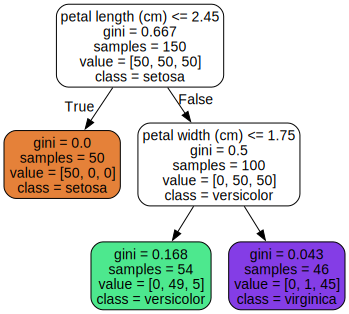

In [93]:
# Display the graphviz file
from graphviz import Source

Source.from_file("iris_tree.dot")

In [106]:
tree = tree_clf.tree_

In [107]:
help(tree)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [108]:
tree.n_leaves

3

In [109]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [67]:
tree_clf.predict([[5, 1.5]])

array([1])

In [68]:
iris.target_names[tree_clf.predict([[5, 1.5]])]

array(['versicolor'], dtype='<U10')

In [69]:
tree_clf.predict_proba([[6, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [90]:
tree.impurity

array([0.66666667, 0.        , 0.5       , 0.16803841, 0.04253308])

In [95]:
tree.children_left[0], tree.children_right[0]

(1, 2)

In [97]:
# leave node
tree.children_left[3], tree.children_right[3]

(-1, -1)

In [98]:
tree.children_left == tree.children_right

array([False,  True, False,  True,  True])

In [100]:
# Find all the leave nodes
is_leaf = (tree.children_left == tree.children_right)
np.arange(tree.node_count)[is_leaf]

array([1, 3, 4])

In [101]:
tree.feature

array([ 0, -2,  1, -2, -2], dtype=int64)

In [102]:
tree.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [103]:
tree.value

array([[[0.33333333, 0.33333333, 0.33333333]],

       [[1.        , 0.        , 0.        ]],

       [[0.        , 0.5       , 0.5       ]],

       [[0.        , 0.90740741, 0.09259259]],

       [[0.        , 0.02173913, 0.97826087]]])

In [104]:
tree.n_node_samples

array([150,  50, 100,  54,  46], dtype=int64)

In [70]:
np.log(2)

0.6931471805599453

In [71]:
np.log(150) / np.log(2)

7.22881869049588

In [72]:
np.log2(150)

7.22881869049588

In [73]:
np.log2(2)

1.0

In [74]:
np.log2(8)

3.0

### Regularization

In [77]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

In [79]:
# Evaluate both models on a test set
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=64)

print(tree_clf1.score(X_moons_test, y_moons_test))
print(tree_clf2.score(X_moons_test, y_moons_test))

0.908
0.919


### Decision Tree Regression

In [80]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

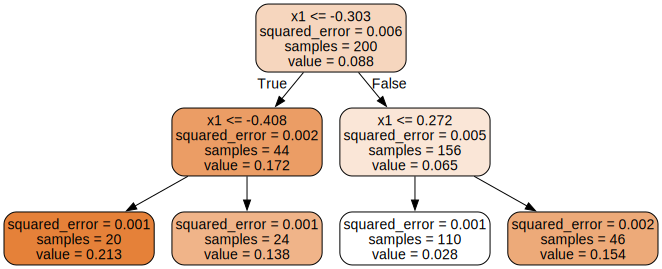

In [81]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
)
Source.from_file("regression_tree.dot")

### Sensitivity to Axis Orientation

In [82]:
# Scale and rotate the data using Principal Component Analysis before fitting
# a DecisionTreeClassifier, to reduce sensitivity to orientation.
# The tree used just one of the transformed features to split the classes pretty well

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)


DecisionTreeClassifier(max_depth=2, random_state=42)

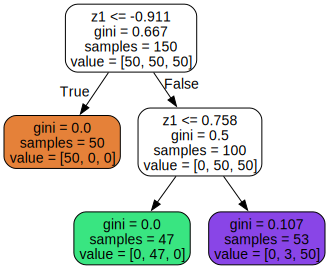

In [83]:
export_graphviz(
    tree_clf_pca,
    out_file="decision_tree_pca.dot",
    feature_names=["z1", "z2"],
    rounded=True,
    filled=True
)
Source.from_file("decision_tree_pca.dot")

In [84]:
# Excercise 1: Approximate depth of a tree trained with one million instances
np.log2(10**6)

19.931568569324174

In [88]:
# Excercise 5
# CART Complexity: O(n* m * log2(m))
# m1 = 1_000_000 -> time1 = 1 hour
# m2 = 10 * m1 -> time2 will be larger by a factor of (n * 10 * m1 * log2(10*m1)) / n * m1 * log2(m1) = 
# = 10 * log2(10 * m1) / log2(m1) = 11.6
print(np.log2(10**7))
print(np.log2(10**6) + np.log2(10))
print(np.log2(10))

23.253496664211536
23.253496664211536
3.321928094887362


In [89]:
np.log2(10**7) / np.log2(10**6)

1.1666666666666667

In [112]:
np.log2(10**6)

19.931568569324174

In [113]:
33.2 / 19.9

1.668341708542714